In [1]:
import json
import os
import pandas as pd


In [2]:
[0, 45, 90, 135] * 2

[0, 45, 90, 135, 0, 45, 90, 135]

In [30]:
def load_test_data(participant_id, blocks):
    all_trials = []

    for block in blocks:
        filepath = f"data/{participant_id}/test_block{block}.json"
        if os.path.exists(filepath):
            with open(filepath, "r") as f:
                block_data = json.load(f)
            for trial in block_data:
                trial["block"] = block  # add block number to each trial
            all_trials.extend(block_data)
        else:
            print(f"File not found: {filepath}")

    return all_trials

# Load and convert to DataFrame
participant_id = "sub-03"  # change as needed
blocks = [1, 2]
all_trials = load_test_data(participant_id, blocks)
df = pd.DataFrame(all_trials)

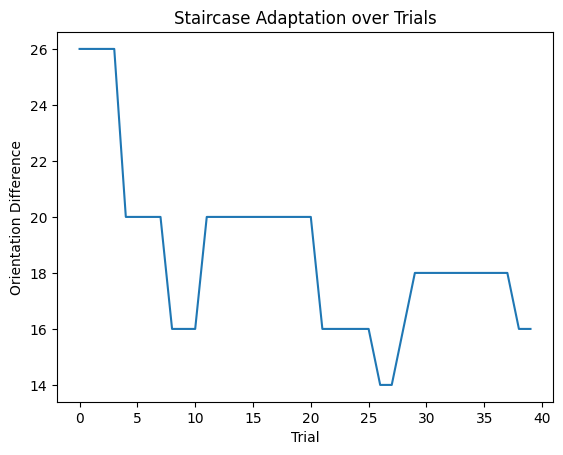

In [36]:
# Show staircase-related columns
staircase_cols = ["ori_diff", "last_direction", "inversions_count", "history", "step_size", "target", "outcome"]
df[staircase_cols].head(30) # adjust rows as needed

# Plot ori_diff over trials
import matplotlib.pyplot as plt

plt.plot(df["ori_diff"])
plt.xlabel("Trial")
plt.ylabel("Orientation Difference")
plt.title("Staircase Adaptation over Trials")
plt.show()

In [40]:
print(df[df["target"]==1][staircase_cols].head(30)) # adjust rows as needed

    ori_diff last_direction  inversions_count  history  step_size  target  \
0         26             up                 1        0          6       1   
1         26             up                 1        1          6       1   
2         26             up                 1        2          6       1   
4         20           down                 2        0          6       1   
5         20           down                 2        1          4       1   
6         20           down                 2        2          4       1   
8         16           down                 2        0          4       1   
11        20             up                 3        0          4       1   
14        20             up                 3        1          4       1   
16        20             up                 3        2          4       1   
21        16           down                 4        0          4       1   
22        16           down                 4        1          2       1   

In [18]:
participant_info_path = "data/sub-02/sub-02_info.json"
with open(participant_info_path, "r") as f:
            participant_data = json.load(f)
staircase_data = load_last_staircase_data(participant_data, 2)

In [19]:
staircase_data

{'ori_diff': 26,
 'inversions_count': 1,
 'last_direction': 'up',
 'history': 0,
 'step_size': 6}

In [15]:
last_trial["ori_diff"]

26

In [13]:
STAIRCASE_PARAMS.keys()

dict_keys(['ori_diff', 'inversions_count', 'last_direction', 'step_size', 'step_update'])

In [19]:
ori_diff, inversions_count, last_direction, step_size, step_update = STAIRCASE_PARAMS.values()

In [5]:
inversions_count

0

In [3]:
ori_diff, inversions_count, last_direction, _, _ = STAIRCASE_PARAMS.values()

In [36]:
df.groupby(["v_leading", "v_pred", "response"])["outcome"].value_counts()

v_leading  v_pred  response    outcome
0          EXP     frequent    1          1
                   infrequent  0          2
           UEX     frequent    0          2
                   infrequent  1          1
90         EXP     frequent    1          1
                   infrequent  0          2
           UEX     frequent    0          2
                   infrequent  1          1
Name: count, dtype: int64

In [37]:
with open('data/sub-04/sub-04_info.json') as f:
    data = json.load(f)

#df_info = pd.DataFrame(data)

FileNotFoundError: [Errno 2] No such file or directory: 'data/sub-04/sub-04_info.json'

In [15]:
df_learning = pd.DataFrame(data["conditions_learning_2"])
df_test = pd.DataFrame(data["conditions_test_3"])

In [16]:
df_learning.groupby("v_leading")["v_trailing"].value_counts()

v_leading  v_trailing
0          135           24
           45             8
90         45            24
           135            8
neutralV   45            16
           135           16
Name: count, dtype: int64

In [17]:
df_test.groupby("v_leading")["v_trailing"].value_counts()

v_leading  v_trailing
0          135           24
           45             8
90         45            24
           135            8
neutralV   45            16
           135           16
Name: count, dtype: int64

In [3]:
df[["v_pred","target", "response", "outcome", "visual_mapping"]]

,v_pred,target,response,outcome,visual_mapping
0,EXP,0,normal,1,1
1,EXP,1,deviant,1,1
2,UEX,0,normal,1,1
3,neutral,0,normal,1,1
4,EXP,0,deviant,0,1
5,neutral,0,deviant,0,1
6,EXP,1,deviant,1,1
7,EXP,1,deviant,1,1
8,EXP,0,normal,1,1
9,neutral,1,deviant,1,1
